In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [2]:
df = pd.read_csv('QVI_data.csv')
df.head(2)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [4]:
df['DATE']= pd.to_datetime(df['DATE'])
df['DATE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 264834 entries, 0 to 264833
Series name: DATE
Non-Null Count   Dtype         
--------------   -----         
264834 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.0 MB


As the client conducted a trial between February 2019 and April 2019, facilitate easy grouping and separation of dates by month and year.

In [5]:
df['YEAR_MONTH'] = df['DATE'].dt.strftime('%Y-%m')
df.head(3)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
#Formulate metrics for trail vs control comparison
group =df.groupby(['YEAR_MONTH','STORE_NBR'])
total_sales= group.TOT_SALES.sum()
unique_customers = group.LYLTY_CARD_NBR.nunique()
trx_vol_percustomer= group.TXN_ID.nunique()/unique_customers

# Concatenate the metrics into a dataframe 
df_Array= [total_sales,unique_customers,trx_vol_percustomer]
df= pd.concat(df_Array, axis=1)

df.columns=["TOT_SALES", "UNIQUE_CUST", "TRX_PER_CUST"]
df

TOT_SALES  UNIQUE_CUST  TRX_PER_CUST
YEAR_MONTH STORE_NBR                                      
2018-07    1              206.9           49      1.061224
           2              150.8           39      1.051282
           3             1205.7          112      1.232143
           4             1399.9          128      1.234375
           5              812.0           93      1.290323
...                         ...          ...           ...
2019-06    268            224.7           38      1.052632
           269            864.4           99      1.282828
           270            912.2          104      1.221154
           271            928.2          108      1.194444
           272            312.1           34      1.088235

[3169 rows x 3 columns]

In [8]:
df.isnull().sum()

TOT_SALES       0
UNIQUE_CUST     0
TRX_PER_CUST    0
dtype: int64

In [9]:
df= df.reset_index()
df

,YEAR_MONTH,STORE_NBR,TOT_SALES,UNIQUE_CUST,TRX_PER_CUST
0,2018-07,1,206.9,49,1.061224
1,2018-07,2,150.8,39,1.051282
2,2018-07,3,1205.7,112,1.232143
3,2018-07,4,1399.9,128,1.234375
4,2018-07,5,812.0,93,1.290323
...,...,...,...,...,...
3164,2019-06,268,224.7,38,1.052632
3165,2019-06,269,864.4,99,1.282828
3166,2019-06,270,912.2,104,1.221154
3167,2019-06,271,928.2,108,1.194444


In [10]:
recorded_stores=pd.pivot_table(df, index="STORE_NBR", columns="YEAR_MONTH", values="TOT_SALES", aggfunc='sum')
recorded_stores

YEAR_MONTH,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
STORE_NBR,,,,,,,,,,,,
1,206.9,176.10,278.8,188.1,192.6,189.6,154.8,225.4,192.9,192.9,221.40,174.1
2,150.8,193.80,154.4,167.8,162.9,136.0,162.8,139.4,192.1,196.5,192.70,156.6
3,1205.7,1079.75,1021.5,1037.9,1008.0,1121.6,1051.7,1197.7,1124.4,920.0,996.90,1037.3
4,1399.9,1259.50,1198.6,1346.4,1212.0,1185.6,1525.0,883.4,1192.4,1230.5,1018.35,1196.0
5,812.0,745.10,896.0,798.0,771.4,879.2,838.0,727.0,681.4,721.8,720.10,910.8
...,...,...,...,...,...,...,...,...,...,...,...,...
268,224.0,322.65,174.4,237.6,225.4,207.3,157.7,165.0,225.0,191.5,245.80,224.7
269,982.0,835.10,886.0,1078.4,967.2,935.4,980.4,955.2,845.8,991.2,900.70,864.4
270,962.8,1003.75,845.4,816.4,965.0,1038.0,1066.6,868.4,991.2,926.4,897.80,912.2


In [11]:
recorded_stores.isnull().sum()

YEAR_MONTH
2018-07    6
2018-08    9
2018-09    8
2018-10    7
2018-11    8
2018-12    9
2019-01    9
2019-02    8
2019-03    7
2019-04    7
2019-05    9
2019-06    8
dtype: int64

In [12]:
unrecorded_stores=[]
for i in recorded_stores.index:
    if recorded_stores.loc[i].isnull().any():
        unrecorded_stores.append(i)
unrecorded_stores

[11, 31, 44, 76, 85, 92, 117, 193, 206, 211, 218, 252]

In [13]:
df = df.drop(unrecorded_stores,axis=0)
df

,YEAR_MONTH,STORE_NBR,TOT_SALES,UNIQUE_CUST,TRX_PER_CUST
0,2018-07,1,206.9,49,1.061224
1,2018-07,2,150.8,39,1.051282
2,2018-07,3,1205.7,112,1.232143
3,2018-07,4,1399.9,128,1.234375
4,2018-07,5,812.0,93,1.290323
...,...,...,...,...,...
3164,2019-06,268,224.7,38,1.052632
3165,2019-06,269,864.4,99,1.282828
3166,2019-06,270,912.2,104,1.221154
3167,2019-06,271,928.2,108,1.194444


In [14]:
# Filter data before Trial Period
pretrial = df[df["YEAR_MONTH"] < "2019-02"]
pretrial

,YEAR_MONTH,STORE_NBR,TOT_SALES,UNIQUE_CUST,TRX_PER_CUST
0,2018-07,1,206.9,49,1.061224
1,2018-07,2,150.8,39,1.051282
2,2018-07,3,1205.7,112,1.232143
3,2018-07,4,1399.9,128,1.234375
4,2018-07,5,812.0,93,1.290323
...,...,...,...,...,...
1843,2019-01,268,157.7,37,1.027027
1844,2019-01,269,980.4,110,1.309091
1845,2019-01,270,1066.6,117,1.307692
1846,2019-01,271,842.4,92,1.282609


In [15]:
#Seperate Trial and Control Store Data (Before Trail Period)
control_stores = pretrial[~pretrial['STORE_NBR'].isin([77, 86, 88])][['STORE_NBR',"TOT_SALES", "UNIQUE_CUST", "TRX_PER_CUST"]].groupby('STORE_NBR').sum()
control_stores = control_stores.reset_index()
control_stores 

,STORE_NBR,TOT_SALES,UNIQUE_CUST,TRX_PER_CUST
0,1,1386.90,317,7.327967
1,2,1128.50,272,7.359700
2,3,7526.15,744,8.209829
3,4,9127.00,849,8.535253
4,5,5739.70,651,8.791906
...,...,...,...,...
263,268,1549.05,304,7.373037
264,269,6664.50,746,8.921035
265,270,6697.95,734,9.147187
266,271,5765.10,652,8.671966


In [16]:
control_stores.isnull().sum()

STORE_NBR       0
TOT_SALES       0
UNIQUE_CUST     0
TRX_PER_CUST    0
dtype: int64

In [17]:
trial_stores=pretrial[(pretrial.STORE_NBR==77 ) | (pretrial.STORE_NBR==86) | (pretrial.STORE_NBR==88)][["TOT_SALES", "UNIQUE_CUST", "TRX_PER_CUST"]].groupby(pretrial.STORE_NBR).sum()
trial_stores = trial_stores.reset_index()
trial_stores

,STORE_NBR,TOT_SALES,UNIQUE_CUST,TRX_PER_CUST
0,77,1699.00,299,7.405289
1,86,6119.85,697,8.798544
2,88,9383.60,880,8.523817


**Identify Control Stores performing closest to Trial Stores**

STORE: 77

In [18]:
# Define the target values
target_tot_sales = 1699.00
target_unique_cust = 299
target_trx_per_cust = 7.405289

# Calculate absolute tolerances for each metric
tolerance_tot_sales = 70  # Adjust tolerance as needed
tolerance_unique_cust = 8
tolerance_trx_per_cust = 0.2 

# Filter control stores based on proximity to target values
filtered_control_stores = control_stores[
    (control_stores['TOT_SALES'].between(target_tot_sales - tolerance_tot_sales, target_tot_sales + tolerance_tot_sales)) &
    (control_stores['UNIQUE_CUST'].between(target_unique_cust - tolerance_unique_cust, target_unique_cust + tolerance_unique_cust)) &
    (control_stores['TRX_PER_CUST'].between(target_trx_per_cust - tolerance_trx_per_cust, target_trx_per_cust + tolerance_trx_per_cust))
]

filtered_control_stores

,STORE_NBR,TOT_SALES,UNIQUE_CUST,TRX_PER_CUST
45,46,1758.0,302,7.311074
86,90,1736.4,291,7.320178
228,233,1659.8,298,7.289320
250,255,1636.6,305,7.300116


STORE: 86

In [19]:
target_tot_sales = 6119.85
target_unique_cust = 697	
target_trx_per_cust = 8.798544

tolerance_tot_sales = 30  
tolerance_unique_cust = 18  
tolerance_trx_per_cust = 0.3  


filtered_control_stores2 = control_stores[
    (control_stores['TOT_SALES'].between(target_tot_sales - tolerance_tot_sales, target_tot_sales + tolerance_tot_sales)) &
    (control_stores['UNIQUE_CUST'].between(target_unique_cust - tolerance_unique_cust, target_unique_cust + tolerance_unique_cust)) &
    (control_stores['TRX_PER_CUST'].between(target_trx_per_cust - tolerance_trx_per_cust, target_trx_per_cust + tolerance_trx_per_cust))
]

filtered_control_stores2

,STORE_NBR,TOT_SALES,UNIQUE_CUST,TRX_PER_CUST
56,57,6147.4,699,8.766729
191,196,6126.3,696,8.757828
220,225,6090.6,694,8.774875


STORE: 88

In [20]:
target_tot_sales = 9383.60
target_unique_cust = 880	
target_trx_per_cust = 8.523817

tolerance_tot_sales = 250
tolerance_unique_cust = 25 
tolerance_trx_per_cust = 0.3  


filtered_control_stores3 = control_stores[
    (control_stores['TOT_SALES'].between(target_tot_sales - tolerance_tot_sales, target_tot_sales + tolerance_tot_sales)) &
    (control_stores['UNIQUE_CUST'].between(target_unique_cust - tolerance_unique_cust, target_unique_cust + tolerance_unique_cust)) &
    (control_stores['TRX_PER_CUST'].between(target_trx_per_cust - tolerance_trx_per_cust, target_trx_per_cust + tolerance_trx_per_cust))
]

filtered_control_stores3

,STORE_NBR,TOT_SALES,UNIQUE_CUST,TRX_PER_CUST
57,58,9178.75,874,8.341477
160,165,9237.80,862,8.430428
232,237,9369.00,885,8.434530


In [21]:
df['YEAR_MONTH'].info()

<class 'pandas.core.series.Series'>
Index: 3157 entries, 0 to 3168
Series name: YEAR_MONTH
Non-Null Count  Dtype 
--------------  ----- 
3157 non-null   object
dtypes: object(1)
memory usage: 49.3+ KB


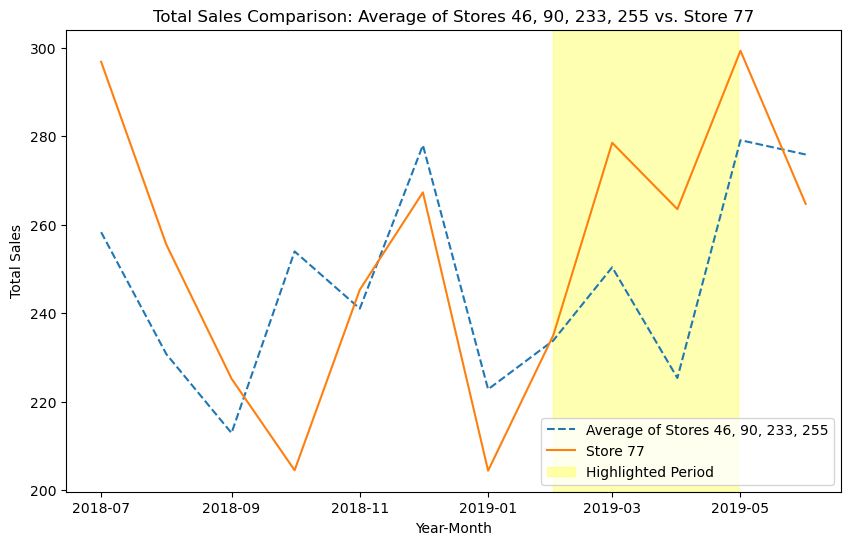

In [22]:
# Define the stores to compare and the reference store
stores_to_compare = [46, 90, 233, 255]
reference_store = 77

# Filter data for the required stores
filtered_df = df[df['STORE_NBR'].isin(stores_to_compare + [reference_store])]

# Convert YEAR_MONTH to datetime for proper plotting and filtering
filtered_df['YEAR_MONTH'] = pd.to_datetime(filtered_df['YEAR_MONTH'], format='%Y-%m')

# Pivot the DataFrame to have 'YEAR_MONTH' as index and 'STORE_NBR' as columns
pivot_df = filtered_df.pivot(index='YEAR_MONTH', columns='STORE_NBR', values='TOT_SALES')

# Calculate the average total sales for the specified stores
pivot_df['Average'] = pivot_df[stores_to_compare].mean(axis=1)


plt.figure(figsize=(10, 6))
plt.plot(pivot_df.index, pivot_df['Average'], label='Average of Stores 46, 90, 233, 255', linestyle='--')

# Plot the total sales for Store 77
plt.plot(pivot_df.index, pivot_df[reference_store], label='Store 77', linestyle='-')

# Highlight the date range from February 2019 to April 2019
highlight_start = pd.to_datetime('2019-02-01')
highlight_end = pd.to_datetime('2019-04-30')
plt.axvspan(highlight_start, highlight_end, color='yellow', alpha=0.3, label='Highlighted Period')

plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.title('Total Sales Comparison: Average of Stores 46, 90, 233, 255 vs. Store 77')
plt.legend()
plt.show()

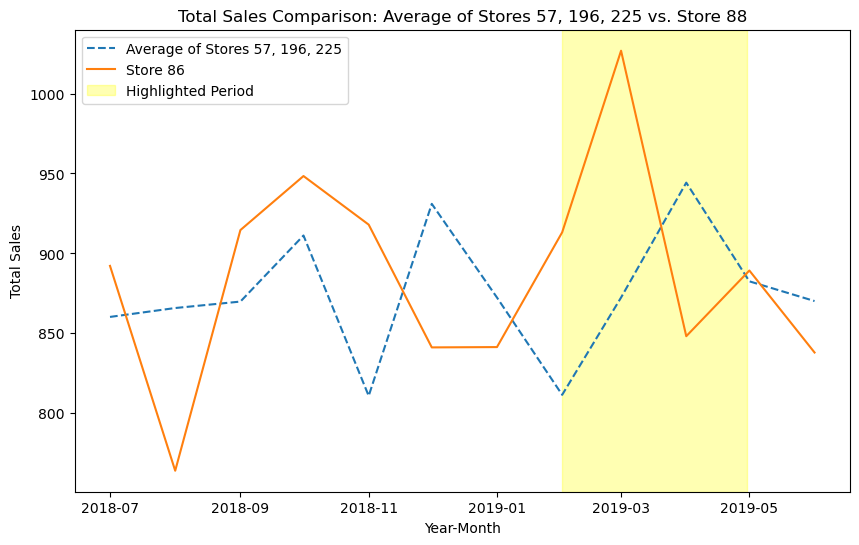

In [23]:
# Define the stores to compare and the reference store
stores_to_compare = [57, 196, 225]
reference_store = 86

# Filter data for the required stores
filtered_df = df[df['STORE_NBR'].isin(stores_to_compare + [reference_store])]

# Convert YEAR_MONTH to datetime for proper plotting and filtering
filtered_df['YEAR_MONTH'] = pd.to_datetime(filtered_df['YEAR_MONTH'], format='%Y-%m')

# Pivot the DataFrame to have 'YEAR_MONTH' as index and 'STORE_NBR' as columns
pivot_df = filtered_df.pivot(index='YEAR_MONTH', columns='STORE_NBR', values='TOT_SALES')

# Calculate the average total sales for the specified stores
pivot_df['Average'] = pivot_df[stores_to_compare].mean(axis=1)


plt.figure(figsize=(10, 6))
plt.plot(pivot_df.index, pivot_df['Average'], label='Average of Stores 57, 196, 225', linestyle='--')

# Plot the total sales for Store 86
plt.plot(pivot_df.index, pivot_df[reference_store], label='Store 86', linestyle='-')

# Highlight the date range from February 2019 to April 2019
highlight_start = pd.to_datetime('2019-02-01')
highlight_end = pd.to_datetime('2019-04-30')
plt.axvspan(highlight_start, highlight_end, color='yellow', alpha=0.3, label='Highlighted Period')

plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.title('Total Sales Comparison: Average of Stores 57, 196, 225 vs. Store 88')
plt.legend()
plt.show()

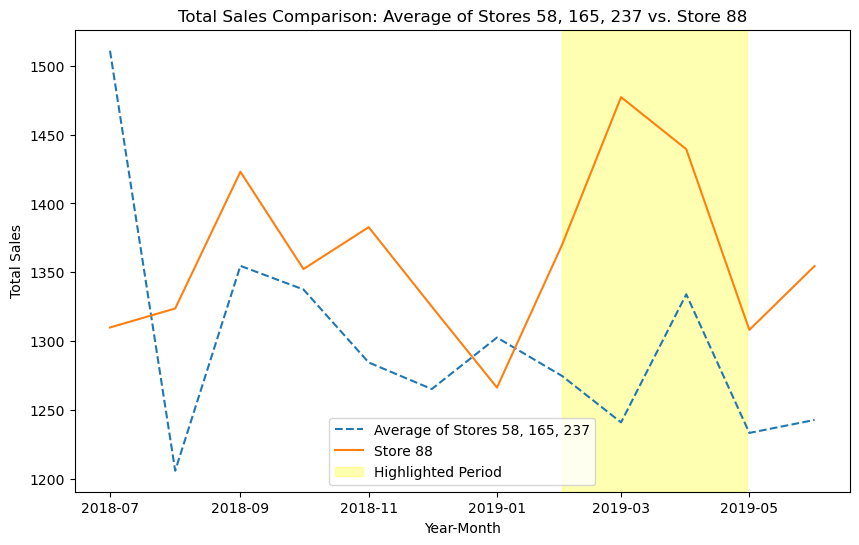

In [24]:
# Define the stores to compare and the reference store
stores_to_compare = [58, 165, 237]
reference_store = 88

# Filter data for the required stores
filtered_df = df[df['STORE_NBR'].isin(stores_to_compare + [reference_store])]

# Convert YEAR_MONTH to datetime for proper plotting and filtering
filtered_df['YEAR_MONTH'] = pd.to_datetime(filtered_df['YEAR_MONTH'], format='%Y-%m')

# Pivot the DataFrame to have 'YEAR_MONTH' as index and 'STORE_NBR' as columns
pivot_df = filtered_df.pivot(index='YEAR_MONTH', columns='STORE_NBR', values='TOT_SALES')

# Calculate the average total sales for the specified stores
pivot_df['Average'] = pivot_df[stores_to_compare].mean(axis=1)


plt.figure(figsize=(10, 6))
plt.plot(pivot_df.index, pivot_df['Average'], label='Average of Stores 58, 165, 237', linestyle='--')

# Plot the total sales for Store 88
plt.plot(pivot_df.index, pivot_df[reference_store], label='Store 88', linestyle='-')

# Highlight the date range from February 2019 to April 2019
highlight_start = pd.to_datetime('2019-02-01')
highlight_end = pd.to_datetime('2019-04-30')
plt.axvspan(highlight_start, highlight_end, color='yellow', alpha=0.3, label='Highlighted Period')

plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.title('Total Sales Comparison: Average of Stores 58, 165, 237 vs. Store 88')
plt.legend()
plt.show()

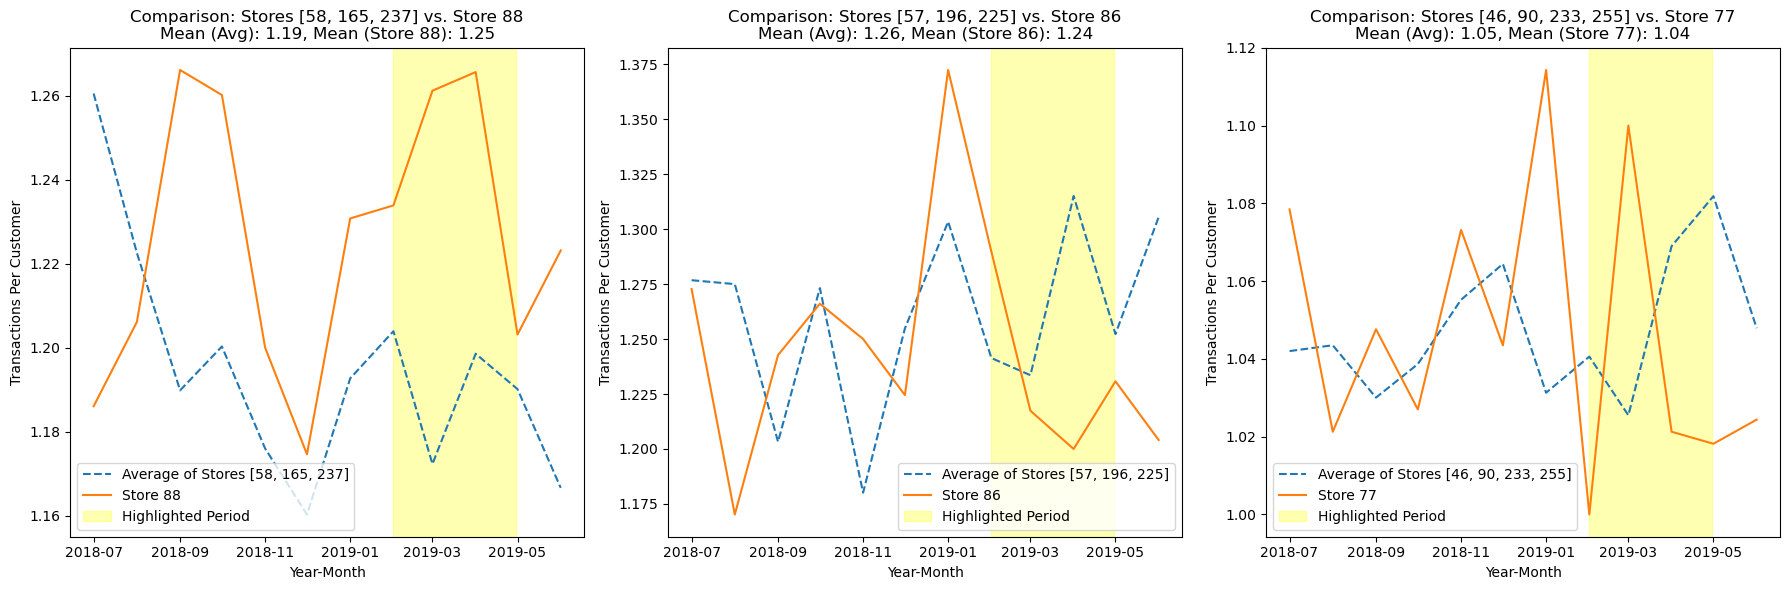

In [25]:
def plot_comparison_chart(ax, stores_to_compare, reference_store, highlight_start, highlight_end):
    # Filter data for the required stores
    filtered_df = df[df['STORE_NBR'].isin(stores_to_compare + [reference_store])]

    # Convert YEAR_MONTH to datetime for proper plotting and filtering
    filtered_df['YEAR_MONTH'] = pd.to_datetime(filtered_df['YEAR_MONTH'], format='%Y-%m')

    # Pivot the DataFrame to have 'YEAR_MONTH' as index and 'STORE_NBR' as columns
    pivot_df = filtered_df.pivot(index='YEAR_MONTH', columns='STORE_NBR', values='TRX_PER_CUST')

    # Calculate the average transactions per customer for the specified stores
    pivot_df['Average'] = pivot_df[stores_to_compare].mean(axis=1)

    # Plot the average transactions per customer
    ax.plot(pivot_df.index, pivot_df['Average'], label=f'Average of Stores {stores_to_compare}', linestyle='--')

    # Plot the transactions per customer for the reference store
    ax.plot(pivot_df.index, pivot_df[reference_store], label=f'Store {reference_store}', linestyle='-')

    # Highlight the date range from February 2019 to April 2019
    ax.axvspan(highlight_start, highlight_end, color='yellow', alpha=0.3, label='Highlighted Period')

    # Calculate mean during the highlighted period
    highlighted_period_df = pivot_df.loc[highlight_start:highlight_end]
    mean_avg = highlighted_period_df['Average'].mean()
    mean_reference = highlighted_period_df[reference_store].mean()

    # Display mean values in the title
    ax.set_title(f'Comparison: Stores {stores_to_compare} vs. Store {reference_store}\n'
                 f'Mean (Avg): {mean_avg:.2f}, Mean (Store {reference_store}): {mean_reference:.2f}')

    ax.set_xlabel('Year-Month')
    ax.set_ylabel('Transactions Per Customer')
    ax.legend()

# Define the date range to highlight
highlight_start = pd.to_datetime('2019-02-01')
highlight_end = pd.to_datetime('2019-04-30')

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot the first comparison
stores_to_compare = [58, 165, 237]
reference_store = 88
plot_comparison_chart(axs[0], stores_to_compare, reference_store, highlight_start, highlight_end)

# Plot the second comparison
stores_to_compare = [57, 196, 225]
reference_store = 86
plot_comparison_chart(axs[1], stores_to_compare, reference_store, highlight_start, highlight_end)

# Plot the third comparison
stores_to_compare = [46, 90, 233, 255]
reference_store = 77
plot_comparison_chart(axs[2], stores_to_compare, reference_store, highlight_start, highlight_end)

plt.tight_layout()
plt.show()

**Insights:**

The change in Layout has facilitated increase of sales whilist ensuring customers buy more product in a single transaction.